In [2]:
%cd ..

/home/tianshu/Documents/dart


In [32]:
from dart.dataset import load_arrays
import h5py
import numpy as np


DATASET = "data/arena-2/data.h5"

data = load_arrays(DATASET)

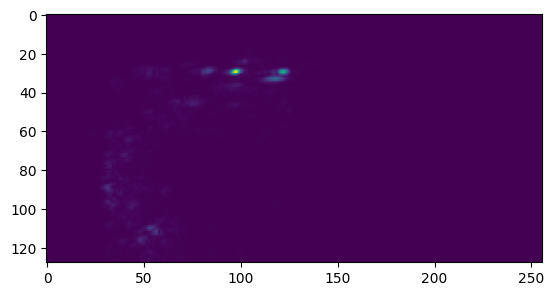

In [33]:
plt.imshow(data["rad"][1000, :, :, 0])

In [6]:
tmp = np.array(data["rad"]).reshape(-1)

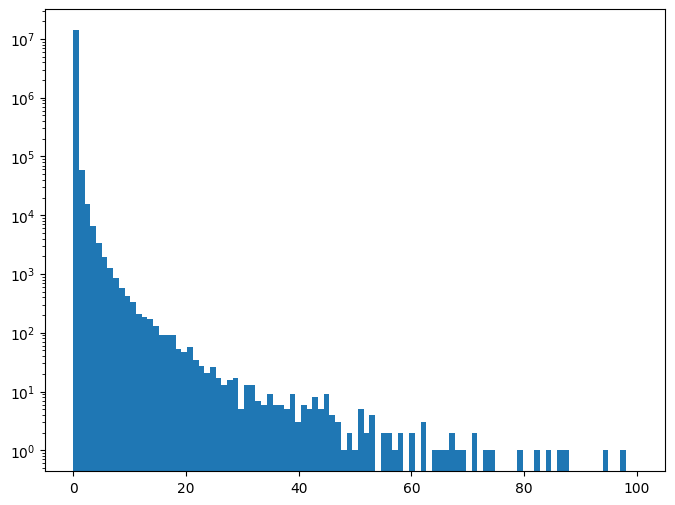

In [26]:
from matplotlib import pyplot as plt

fig, axs = plt.subplots(1, 1, figsize=(8, 6))
axs.hist(tmp[::100], bins=np.linspace(0, 100, 100))
axs.set_yscale('log')

In [ ]:
data["rad"] = (data["rad"] / np.max(data["rad"]) * 65504).astype(np.float16)
with h5py.File(DATASET, 'w') as hf:
    for k, v in data.items():
        hf.create_dataset(k, data=v)
    hf.close()

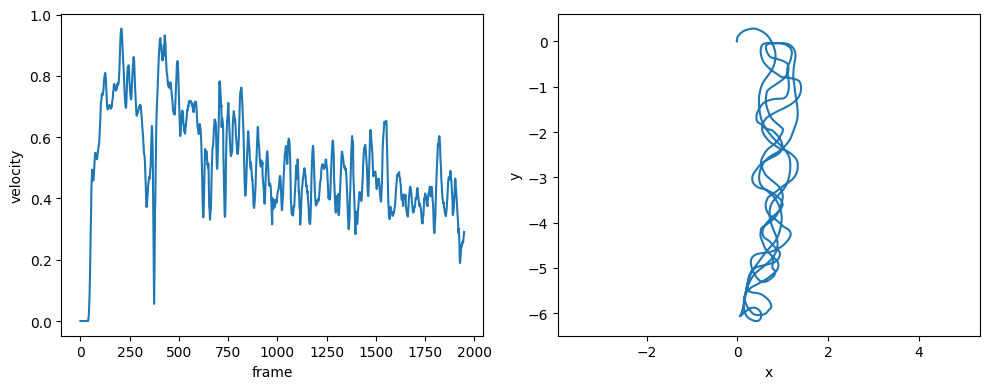

In [4]:
from matplotlib import pyplot as plt
import numpy as np

fig, axs = plt.subplots(1, 2, figsize=(10, 4))
axs[0].plot(np.linalg.norm(data["vel"], axis=1))
axs[1].plot(data["pos"][:, 0], data["pos"][:, 1])
axs[1].axis('equal')

axs[0].set_xlabel("frame")
axs[0].set_ylabel("velocity")
axs[1].set_xlabel("x")
axs[1].set_ylabel("y")

fig.tight_layout()